### Importing Necessary libraries

In [48]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [49]:
forest_fire = pd.read_csv('forestfires.csv')
forest_fire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


In [50]:
pd.set_option('display.max_columns', None)

### Data Understanding and Preperation

In [51]:
forest_fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [52]:
forest_fire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


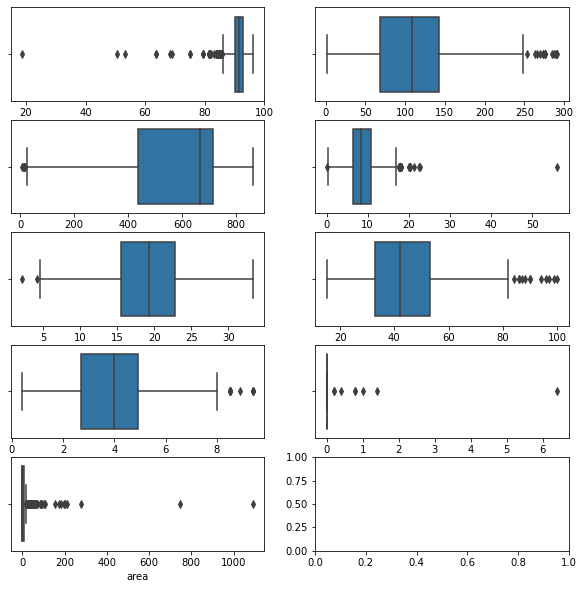

In [53]:
plt.rcParams["figure.figsize"] = [10, 10]
#define dimensions of subplots (rows, columns)
fig, axes = plt.subplots(5, 2)

#create chart in each subplot
sns.boxplot(forest_fire.FFMC, ax=axes[0,0])
sns.boxplot(forest_fire.DMC, ax=axes[0,1])
sns.boxplot(forest_fire.DC, ax=axes[1,0])
sns.boxplot(forest_fire.ISI, ax=axes[1,1])
sns.boxplot(forest_fire.temp, ax=axes[2,0])
sns.boxplot(forest_fire.RH, ax=axes[2,1])
sns.boxplot(forest_fire.wind, ax=axes[3,0])
sns.boxplot(forest_fire.rain, ax=axes[3,1])
sns.boxplot(forest_fire.area, ax=axes[4,0])
plt.show()

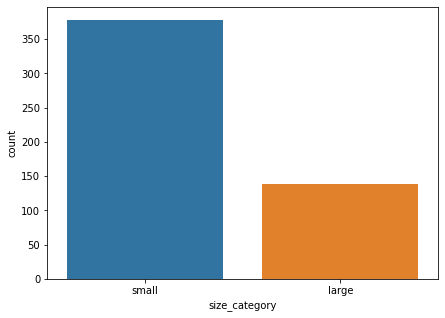

In [57]:
plt.figure(figsize=(7,5))
sns.countplot(forest_fire.size_category)
plt.show()

In [8]:
forest_fire.size_category.unique()

array(['small', 'large'], dtype=object)

In [9]:
df = forest_fire.drop(labels=['month','day'],axis = 1)
df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


In [18]:
df.std()

FFMC          5.520111
DMC          64.046482
DC          248.066192
ISI           4.559477
temp          5.806625
RH           16.317469
wind          1.791653
rain          0.295959
area         63.655818
dayfri        0.371006
daymon        0.350548
daysat        0.369244
daysun        0.387657
daythu        0.322907
daytue        0.329662
daywed        0.306138
monthapr      0.130913
monthaug      0.479249
monthdec      0.130913
monthfeb      0.193029
monthjan      0.062137
monthjul      0.241199
monthjun      0.178500
monthmar      0.306138
monthmay      0.062137
monthnov      0.043980
monthoct      0.168007
monthsep      0.471632
dtype: float64

In [19]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1:]

In [20]:
std_scale = StandardScaler()
scaled_X = std_scale.fit_transform(X)
scaled_X = pd.DataFrame(scaled_X,columns=X.columns)
scaled_X

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.202020,2.254407,-0.408709,-0.440449,-0.474467,-0.365748,-0.375873,-0.341512,-0.133103,-0.743339,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.202020,-0.443576,-0.408709,-0.440449,-0.474467,-0.365748,2.660475,-0.341512,-0.133103,-0.743339,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,5.785038,-0.706081
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.202020,-0.443576,-0.408709,2.270410,-0.474467,-0.365748,-0.375873,-0.341512,-0.133103,-0.743339,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,5.785038,-0.706081
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.202020,2.254407,-0.408709,-0.440449,-0.474467,-0.365748,-0.375873,-0.341512,-0.133103,-0.743339,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.202020,-0.443576,-0.408709,-0.440449,2.107630,-0.365748,-0.375873,-0.341512,-0.133103,-0.743339,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268,-0.100753,-0.443576,-0.408709,-0.440449,2.107630,-0.365748,-0.375873,-0.341512,-0.133103,1.345282,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.172860,-0.706081
513,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268,0.651674,-0.443576,-0.408709,-0.440449,2.107630,-0.365748,-0.375873,-0.341512,-0.133103,1.345282,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.172860,-0.706081
514,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268,-0.026532,-0.443576,-0.408709,-0.440449,2.107630,-0.365748,-0.375873,-0.341512,-0.133103,1.345282,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.172860,-0.706081
515,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268,-0.202020,-0.443576,-0.408709,2.270410,-0.474467,-0.365748,-0.375873,-0.341512,-0.133103,1.345282,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.172860,-0.706081


In [21]:
le = LabelEncoder()
y.size_category = le.fit_transform(y.size_category)
y

,size_category
0,1
1,1
2,1
3,1
4,1
...,...
512,0
513,0
514,0
515,1


In [22]:
X_train,X_test,y_train,y_test = train_test_split(scaled_X,y,test_size=0.20,random_state=12,stratify=y)
X_train.shape,X_test.shape

((413, 28), (104, 28))

In [23]:
y.size_category.value_counts()

1    378
0    139
Name: size_category, dtype: int64

### Model building

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout

In [25]:
model = Sequential()
model.add(Dense(units = 50, activation = 'relu',input_dim = 28))
model.add(Dropout(0.2))
model.add(Dense(units = 25, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1450      
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 25)                1275      
                                                                 
 dropout_1 (Dropout)         (None, 25)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 2,751
Trainable params: 2,751
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(optimizer='Adam',loss=tf.keras.losses.Huber() ,metrics = ['accuracy'])

In [39]:
model.fit(X_train,y_train,epochs=50,batch_size = 5,)

Epoch 1/50
83/83 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 0.9976
Epoch 2/50
83/83 [==============================] - 0s 2ms/step - loss: 6.6552e-04 - accuracy: 0.9976
Epoch 3/50
83/83 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 0.9976
Epoch 4/50
83/83 [==============================] - 0s 2ms/step - loss: 1.4590e-04 - accuracy: 1.0000
Epoch 5/50
83/83 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 0.9952
Epoch 6/50
83/83 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 0.9927
Epoch 7/50
83/83 [==============================] - 0s 2ms/step - loss: 0.0051 - accuracy: 0.9855
Epoch 8/50
83/83 [==============================] - 0s 2ms/step - loss: 8.0331e-04 - accuracy: 0.9976
Epoch 9/50
83/83 [==============================] - 0s 2ms/step - loss: 0.0044 - accuracy: 0.9903
Epoch 10/50
83/83 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 0.9952
Epoch 1

##### finding best epoch and batchsize

In [28]:
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for i in batch_size_list:
        for j in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units = 50, activation = 'relu',input_dim = 28))
            model.add(Dropout(0.2))
            model.add(Dense(units = 25, activation = 'relu'))
            model.add(Dropout(0.2))
            model.add(Dense(units = 1, activation='sigmoid'))
            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam', metrics='accuracy')
 
            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = i, epochs = j)
 
            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', i,'-', 'epochs:',j, 'Accuracy:', 100-MAPE)
            
         
 

# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

Epoch 1/5
83/83 [==============================] - 1s 2ms/step - loss: 0.2038 - accuracy: 0.7337
Epoch 2/5
83/83 [==============================] - 0s 2ms/step - loss: 0.1914 - accuracy: 0.7337
Epoch 3/5
83/83 [==============================] - 0s 2ms/step - loss: 0.1831 - accuracy: 0.7385
Epoch 4/5
83/83 [==============================] - 0s 2ms/step - loss: 0.1767 - accuracy: 0.7530
Epoch 5/5
83/83 [==============================] - 0s 2ms/step - loss: 0.1677 - accuracy: 0.7772
1 Parameters: batch_size: 5 - epochs: 5 Accuracy: size_category   -inf
dtype: float64
Epoch 1/10
83/83 [==============================] - 1s 2ms/step - loss: 0.2241 - accuracy: 0.6610
Epoch 2/10
83/83 [==============================] - 0s 2ms/step - loss: 0.2026 - accuracy: 0.7264
Epoch 3/10
83/83 [==============================] - 0s 2ms/step - loss: 0.1830 - accuracy: 0.7530
Epoch 4/10
83/83 [==============================] - 0s 2ms/step - loss: 0.1761 - accuracy: 0.7603
Epoch 5/10
83/83 [===================

83/83 [==============================] - 0s 2ms/step - loss: 0.1092 - accuracy: 0.8571
Epoch 17/100
83/83 [==============================] - 0s 2ms/step - loss: 0.1108 - accuracy: 0.8305
Epoch 18/100
83/83 [==============================] - 0s 2ms/step - loss: 0.1089 - accuracy: 0.8475
Epoch 19/100
83/83 [==============================] - 0s 2ms/step - loss: 0.1010 - accuracy: 0.8620
Epoch 20/100
83/83 [==============================] - 0s 2ms/step - loss: 0.0948 - accuracy: 0.8692
Epoch 21/100
83/83 [==============================] - 0s 2ms/step - loss: 0.0959 - accuracy: 0.8789
Epoch 22/100
83/83 [==============================] - 0s 2ms/step - loss: 0.0842 - accuracy: 0.8983
Epoch 23/100
83/83 [==============================] - 0s 2ms/step - loss: 0.0854 - accuracy: 0.8814
Epoch 24/100
83/83 [==============================] - 0s 2ms/step - loss: 0.0809 - accuracy: 0.8862
Epoch 25/100
83/83 [==============================] - 0s 2ms/step - loss: 0.0697 - accuracy: 0.9153
Epoch 26/100


83/83 [==============================] - 0s 2ms/step - loss: 0.0140 - accuracy: 0.9831
Epoch 99/100
83/83 [==============================] - 0s 2ms/step - loss: 0.0083 - accuracy: 0.9903
Epoch 100/100
83/83 [==============================] - 0s 2ms/step - loss: 0.0070 - accuracy: 0.9952
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: size_category   -inf
dtype: float64
Epoch 1/5
42/42 [==============================] - 1s 2ms/step - loss: 0.2330 - accuracy: 0.6247
Epoch 2/5
42/42 [==============================] - 0s 2ms/step - loss: 0.2043 - accuracy: 0.7312
Epoch 3/5
42/42 [==============================] - 0s 3ms/step - loss: 0.1833 - accuracy: 0.7506
Epoch 4/5
42/42 [==============================] - 0s 2ms/step - loss: 0.1836 - accuracy: 0.7433
Epoch 5/5
42/42 [==============================] - 0s 3ms/step - loss: 0.1802 - accuracy: 0.7506
5 Parameters: batch_size: 10 - epochs: 5 Accuracy: size_category   -inf
dtype: float64
Epoch 1/10
42/42 [==============================] - 

42/42 [==============================] - 0s 3ms/step - loss: 0.1507 - accuracy: 0.7845
Epoch 13/100
42/42 [==============================] - 0s 2ms/step - loss: 0.1380 - accuracy: 0.8160
Epoch 14/100
42/42 [==============================] - 0s 2ms/step - loss: 0.1373 - accuracy: 0.8015
Epoch 15/100
42/42 [==============================] - 0s 2ms/step - loss: 0.1258 - accuracy: 0.8184
Epoch 16/100
42/42 [==============================] - 0s 2ms/step - loss: 0.1271 - accuracy: 0.8305
Epoch 17/100
42/42 [==============================] - 0s 2ms/step - loss: 0.1190 - accuracy: 0.8426
Epoch 18/100
42/42 [==============================] - 0s 2ms/step - loss: 0.1294 - accuracy: 0.8208
Epoch 19/100
42/42 [==============================] - 0s 2ms/step - loss: 0.1160 - accuracy: 0.8354
Epoch 20/100
42/42 [==============================] - 0s 2ms/step - loss: 0.1232 - accuracy: 0.8354
Epoch 21/100
42/42 [==============================] - 0s 2ms/step - loss: 0.1013 - accuracy: 0.8741
Epoch 22/100


42/42 [==============================] - 0s 2ms/step - loss: 0.0086 - accuracy: 0.9903
Epoch 95/100
42/42 [==============================] - 0s 2ms/step - loss: 0.0162 - accuracy: 0.9831
Epoch 96/100
42/42 [==============================] - 0s 2ms/step - loss: 0.0166 - accuracy: 0.9782
Epoch 97/100
42/42 [==============================] - 0s 2ms/step - loss: 0.0101 - accuracy: 0.9903
Epoch 98/100
42/42 [==============================] - 0s 2ms/step - loss: 0.0090 - accuracy: 0.9879
Epoch 99/100
42/42 [==============================] - 0s 2ms/step - loss: 0.0125 - accuracy: 0.9855
Epoch 100/100
42/42 [==============================] - 0s 2ms/step - loss: 0.0097 - accuracy: 0.9855
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: size_category   -inf
dtype: float64
Epoch 1/5
28/28 [==============================] - 1s 2ms/step - loss: 0.2167 - accuracy: 0.7022
Epoch 2/5
28/28 [==============================] - 0s 3ms/step - loss: 0.1978 - accuracy: 0.7361
Epoch 3/5
28/28 [============

28/28 [==============================] - 0s 3ms/step - loss: 0.1669 - accuracy: 0.7797
Epoch 9/100
28/28 [==============================] - 0s 2ms/step - loss: 0.1653 - accuracy: 0.7821
Epoch 10/100
28/28 [==============================] - 0s 2ms/step - loss: 0.1535 - accuracy: 0.7772
Epoch 11/100
28/28 [==============================] - 0s 2ms/step - loss: 0.1512 - accuracy: 0.7869
Epoch 12/100
28/28 [==============================] - 0s 2ms/step - loss: 0.1598 - accuracy: 0.7845
Epoch 13/100
28/28 [==============================] - 0s 2ms/step - loss: 0.1521 - accuracy: 0.7869
Epoch 14/100
28/28 [==============================] - 0s 2ms/step - loss: 0.1536 - accuracy: 0.7869
Epoch 15/100
28/28 [==============================] - 0s 2ms/step - loss: 0.1473 - accuracy: 0.8039
Epoch 16/100
28/28 [==============================] - 0s 2ms/step - loss: 0.1321 - accuracy: 0.8208
Epoch 17/100
28/28 [==============================] - 0s 2ms/step - loss: 0.1434 - accuracy: 0.8087
Epoch 18/100
2

28/28 [==============================] - 0s 2ms/step - loss: 0.0248 - accuracy: 0.9709
Epoch 91/100
28/28 [==============================] - 0s 2ms/step - loss: 0.0308 - accuracy: 0.9492
Epoch 92/100
28/28 [==============================] - 0s 2ms/step - loss: 0.0190 - accuracy: 0.9782
Epoch 93/100
28/28 [==============================] - 0s 2ms/step - loss: 0.0164 - accuracy: 0.9879
Epoch 94/100
28/28 [==============================] - 0s 2ms/step - loss: 0.0182 - accuracy: 0.9831
Epoch 95/100
28/28 [==============================] - 0s 2ms/step - loss: 0.0165 - accuracy: 0.9806
Epoch 96/100
28/28 [==============================] - 0s 2ms/step - loss: 0.0139 - accuracy: 0.9903
Epoch 97/100
28/28 [==============================] - 0s 2ms/step - loss: 0.0171 - accuracy: 0.9831
Epoch 98/100
28/28 [==============================] - 0s 2ms/step - loss: 0.0176 - accuracy: 0.9782
Epoch 99/100
28/28 [==============================] - 0s 2ms/step - loss: 0.0137 - accuracy: 0.9879
Epoch 100/100

21/21 [==============================] - 0s 2ms/step - loss: 0.1962 - accuracy: 0.7288
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1909 - accuracy: 0.7506
Epoch 6/100
21/21 [==============================] - 0s 4ms/step - loss: 0.1884 - accuracy: 0.7458
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1802 - accuracy: 0.7603
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1740 - accuracy: 0.7627
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1777 - accuracy: 0.7603
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1686 - accuracy: 0.7579
Epoch 11/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1706 - accuracy: 0.7651
Epoch 12/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1601 - accuracy: 0.7942
Epoch 13/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1611 - accuracy: 0.7869
Epoch 14/100
21/21

21/21 [==============================] - 0s 2ms/step - loss: 0.0264 - accuracy: 0.9685
Epoch 87/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0314 - accuracy: 0.9540
Epoch 88/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0299 - accuracy: 0.9588
Epoch 89/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0387 - accuracy: 0.9540
Epoch 90/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0236 - accuracy: 0.9758
Epoch 91/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0304 - accuracy: 0.9540
Epoch 92/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0284 - accuracy: 0.9661
Epoch 93/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0283 - accuracy: 0.9613
Epoch 94/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0305 - accuracy: 0.9564
Epoch 95/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0234 - accuracy: 0.9734
Epoch 96/100


In [40]:
prediction = model.predict(X_test)

In [41]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.0254 - accuracy: 0.9423


[0.025395233184099197, 0.942307710647583]

In [42]:
prediction = np.round(prediction)

In [43]:
output = y_test.copy()
output['y_pred'] = prediction

In [44]:
output.head(40)

,size_category,y_pred
446,1,1.0
15,1,1.0
456,1,1.0
282,1,1.0
367,1,1.0
489,1,1.0
383,0,0.0
129,1,1.0
270,1,1.0
158,1,1.0


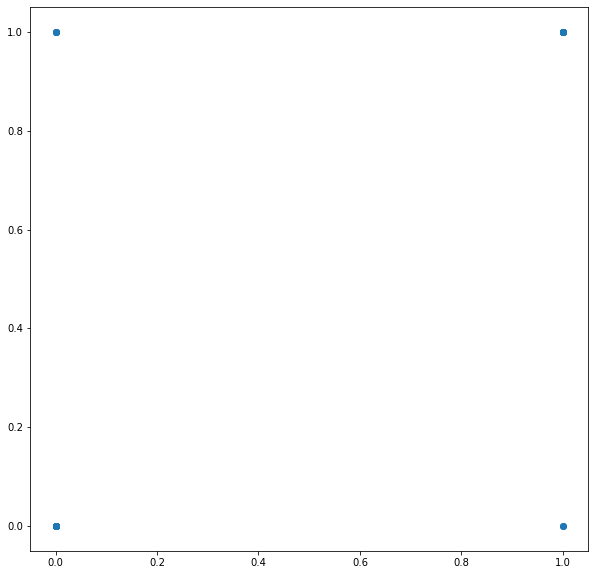

In [46]:
plt.scatter(output.size_category,output.y_pred)
plt.show()